<a href="https://colab.research.google.com/github/theMUGGLER/firstMLProject/blob/main/FirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

# **Steps**
#### *0. Preprocess + EDA + Feature Selection*
#### *1. Extract input and output cols*
#### *2. Scale the values*
#### *3. Train test split*
#### *4. Train the model*
#### *5. Evaluate the model/model selection*
#### *6. Deploy the model*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

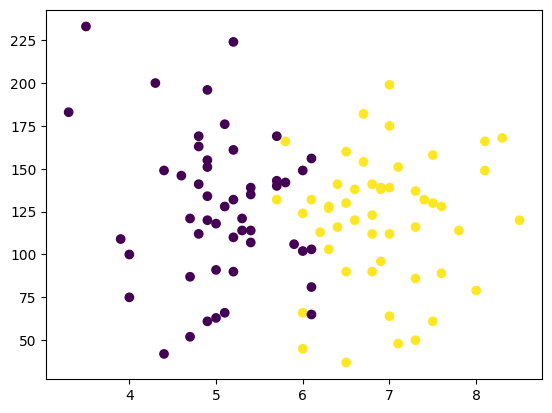

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
independantVariables=df.iloc[:,0:2]
dependantVariables=df.iloc[:,-1]  #gives the last column , we could also do dependantVariables=df.iloc[:,2]

In [ ]:
independantVariables.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
dependantVariables.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(independantVariables,dependantVariables,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train) #transforms values between -1 to 1.

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[-0.96757073,  0.79897346],
       [-0.19082911,  1.08046233],
       [-0.53604761,  0.28717551],
       [-1.05387536,  1.00369264],
       [-0.96757073, -1.60647689],
       [ 0.06808476,  0.82456336],
       [ 1.10374025, -1.88796576],
       [-1.14017998, -1.83678596],
       [ 0.32699863,  0.4407149 ],
       [ 0.75852175,  0.3895351 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

####Model Training

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
clf.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test

76    0
85    1
49    0
34    0
73    0
8     0
77    1
94    0
54    1
60    1
Name: placement, dtype: int64

Calculating Accuracy score by comparing my model against the y_test

In [ ]:
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

How to plot the Decision Boundry

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

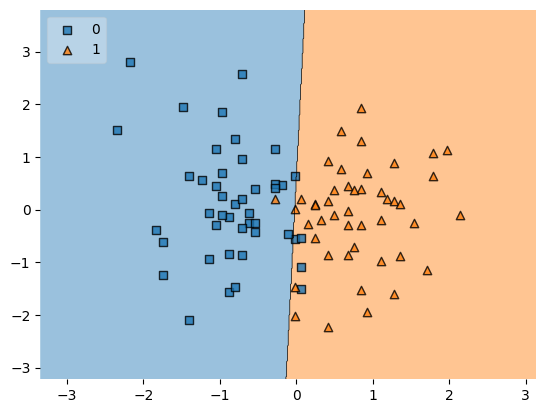

In [ ]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))